In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, Activation, Flatten
from keras.utils import to_categorical

In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [7]:
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [9]:
y_train[0].argmax(axis=0)

np.int64(0)

#### Visualizing Data

In [10]:
def display_image(index):
    """
    based on index in training set, display image
    """
    label = y_train[index]
    image = X_train[index]
    plt.title('Training data, index: %d, Label: %d' % (index, label))
    plt.imshow(image, cmap='gray_r')
    plt.show()


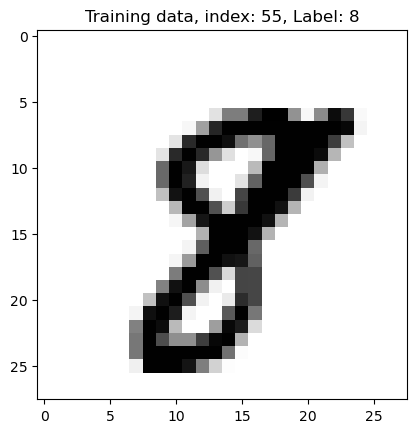

In [12]:
display_image(55)

### Normalizing

In [16]:
X_train = X_train / 255
X_test = X_test / 255

In [19]:
# change from float64 to float32 to reduce memory storage significantly 
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

### One-Hot Encoding

In [20]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [21]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

### Building Network

In [24]:
def build_model():
    model = Sequential([
        Input(shape=(28, 28)),
        Flatten(input_shape = (28, 28), name = 'flatten_layer'),
        Dense(512, input_shape = (784,)),
        Activation('relu'),
        Dropout(0.2), # regularization on fwd prop (sets 20% of neurons to zero to prevent overfitting)
        Dense(512),
        Activation('relu'),
        Dropout(0.2),
        Dense(10),
        Activation('softmax')
    ])
    return model

In [25]:
model = build_model()

/home/bjwei/anaconda3/envs/tf_env/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/home/bjwei/anaconda3/envs/tf_env/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1735424439.636204    5927 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6295 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_layer (Flatten)         │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         5,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [29]:
model.fit(X_train, y_train, 
          batch_size = 128, 
          epochs = 4, 
          verbose = 1,
          validation_data = (X_test, y_test))

Epoch 1/4


I0000 00:00:1735424570.032796   23833 service.cc:148] XLA service 0x7d10cc004660 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1735424570.032874   23833 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2024-12-28 16:22:50.054675: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1735424570.112439   23833 cuda_dnn.cc:529] Loaded cuDNN version 90600


140/469 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7589 - loss: 0.7400

I0000 00:00:1735424571.264875   23833 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8579 - loss: 0.4476

2024-12-28 16:22:53.520810: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_48', 188 bytes spill stores, 188 bytes spill loads

2024-12-28 16:22:53.693055: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_48_0', 228 bytes spill stores, 228 bytes spill loads

2024-12-28 16:22:53.768398: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_48_0', 768 bytes spill stores, 720 bytes spill loads



469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8580 - loss: 0.4472 - val_accuracy: 0.9600 - val_loss: 0.1156
Epoch 2/4
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9668 - loss: 0.1127 - val_accuracy: 0.9747 - val_loss: 0.0851
Epoch 3/4
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9776 - loss: 0.0743 - val_accuracy: 0.9760 - val_loss: 0.0802
Epoch 4/4
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9811 - loss: 0.0581 - val_accuracy: 0.9784 - val_loss: 0.0732


In [30]:
score = model.evaluate(X_test, y_test, 
                       batch_size = 32, 
                       verbose = 1,
                       sample_weight=None)
print('Test score:', score[0])
print('Test accuracy', score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 940us/step - accuracy: 0.9741 - loss: 0.0895
Test score: 0.07318612188100815
Test accuracy 0.9783999919891357
